## An example how to calculate sdg 11.2 indicator for Friedrichshain (Berlin)

In [3]:
import os
import sys
project_path = os.path.abspath('../')
sys.path.append(project_path)
import geopandas as gpd
from matplotlib import pyplot as plt
from ptac import accessibility as accessibility
from ptac import osm as osm

Load stops and population data and generate boundary from population data.
The boundary is necessary to download the network afterwards.

In [4]:
stops = gpd.read_file(project_path + "/data/pt_example.gpkg")
population_points = gpd.read_file(project_path + "/data/population_example.gpkg")
boundary_gdf = gpd.GeoDataFrame(index=[0], crs='epsg:4326', geometry=[population_points.unary_union.convex_hull])

Plot population and pt stops

hi


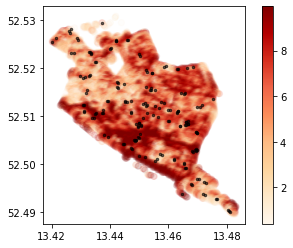

In [8]:
epsg = 25833
ax = population_points.plot(column= "pop", cmap='OrRd', legend=True, alpha=0.1)

stops.plot(color="black", ax=ax, markersize=6, alpha=0.6)
print("hi")

Calculate sum of population in the focus area

In [15]:
population_sum = population_points["pop"].sum()

print(f"Overall sum of population is: {population_sum}")

Overall sum of population is: 88270.7075406313


Now calculate the accessibility from population point data to stations. If you do not pass a network_gdf dataset
, it will be downloaded automatically based on the bounding box.

In [5]:
accessibility_output = accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops,
                                  boundary_geometries=boundary_gdf,
                                  epsg=epsg,
                                  network_gdf=None,
                                  verbose=5)

Starting UrMoAC to calculate accessibilities

UrMoAC request: java -jar -Xmx12g C:\Simon\git\PtAC\ptac/UrMoAccessibilityComputer-0.1-PRERELEASE-shaded.jar --from file;"C:\Users\niel_sm/.ptac/origins.csv" --shortest --to file;"C:\Users\niel_sm/.ptac/destinations.csv" --mode foot --time 35580 --epsg 25833 --ext-nm-output "file;C:\Users\niel_sm/.ptac/sdg_output.txt" --verbose --threads 4 --dropprevious --date 20200915 --net "file;tmp/network.csv"

accessibility to public transport calculated in 19 seconds


It is also possible to download the network before calculating

In [6]:
network_gdf = osm.get_network(boundary_gdf)

Then, we can have a look at the network..

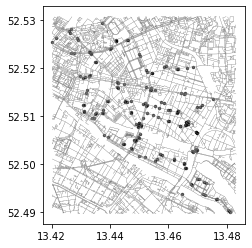

In [12]:
#network_gdf.plot(color="grey", makersize= 4)

ax = stops.plot(color="black", markersize=6, alpha=0.6)
network_gdf.plot(color="grey", linewidth=0.2, ax=ax)
plt.show()

.. and store it to disk. You are able to drag and drop this data set into your GIS software.

In [13]:
network_gdf.to_file("friedshain_network.gpkg", driver="GPKG")

Now, we can calculate again with our stored network

In [19]:
network_gdf = gpd.read_file("friedshain_network.gpkg")

accessibility_output= accessibility.distance_to_closest(start_geometries=population_points,
                                  destination_geometries=stops,
                                  boundary_geometries=boundary_gdf,
                                  epsg=epsg,
                                  network_gdf=network_gdf,
                                  verbose=5)

Street network provided.
Preparing street network for routing.


ValueError: The column label 'street_type' is not unique.

Select starting points which are within 500 meters from the next station

In [18]:
accessibility_output = accessibility_output[accessibility_output["distance_pt"]<500]

print(accessibility_output.head(10))

   index       pop    x_coord    y_coord                        geometry  \
0      0  1.889245  13.441986  52.530828  POINT (394314.570 5821221.644)   
1      1  2.585283  13.441716  52.530558  POINT (394295.644 5821192.064)   
2      2  6.065472  13.437135  52.529480  POINT (393982.293 5821078.889)   
3      3  6.065472  13.437404  52.529480  POINT (394000.573 5821078.493)   
4      4  1.988679  13.440099  52.529480  POINT (394183.374 5821074.539)   
5      5  1.093774  13.443872  52.529480  POINT (394439.296 5821069.014)   
6      6  3.082453  13.434709  52.529211  POINT (393817.122 5821052.480)   
7      7  3.679056  13.434979  52.529211  POINT (393835.402 5821052.084)   
8      8  3.679056  13.435248  52.529211  POINT (393853.682 5821051.688)   
9      9  2.187547  13.435518  52.529211  POINT (393871.963 5821051.291)   

               x             y  o_id   d_id  avg_distance  ...  avg_co2  \
0  394314.570439  5.821222e+06   0.0   76.0    438.964426  ...      0.0   
1  394295.643

Calculate sum of population with access to pt within 500 meters

In [ ]:
sum_pop_with_access = accessibility_output["pop"].sum()
print(sum_pop_with_access)

Calculate the actual indicator and print the result

In [ ]:
sdg_indicator = accessibility.calculate_sdg(population_sum,sum_pop_with_access)
print(" %s percent of the population have access"%sdg_indicator)

Plot result as a map

In [ ]:
accessibility_output.plot(column='distance_pt', cmap='OrRd')
plt.show()
